# In this project I am testing whether the posta of a famous chinese celebrity 'Cai' on his social media receive abnormally high amount of retweets and investigate the reason behind it. I use webscrapping, A/B test, Text-mining, and data visualization to support my claim.

## Getting data

In [1]:
#All codes written by Yuan 'Rabona' Gao. All bugs reserved.
import time
import datetime
import numpy as np
from datascience import *
from bs4 import BeautifulSoup
import re
import requests,json
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

In [6]:
cookies = 'wb_view_log_5902782442=1440*9002; Apache=8546919571058.535.1543797172114; ULV=1543797172119:5:2:1:8546919571058.535.1543797172114:1543720291785; _s_tentry=www.weibo.com; YF-Page-G0=7b9ec0e98d1ec5668c6906382e96b5db; ALF=1575333157; SCF=AsYzgFXV4sqETSKWZWv1Fo0FmF-uKp_UIo85OiH8atK2yi9IUp3EQjFOYFi_h968xMR67ByJg4G59Ywd7DaxuJc.; SSOLoginState=1543797160; SUB=_2A25xAAn4DeRhGeNH61AW-CzIzz6IHXVSdHwwrDV8PUNbmtBeLXj6kW9NSvODMQN7UjJKRLevagDYquP1tOpxa1Eg; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WFV3.yPF51n5GMyNyu8MHzw5JpX5KMhUgL.Fo-4ehzN1hzXShz2dJLoI7LXMrWjqPxLqP-t; SUHB=09P9aYk7yhw4TZ; wvr=6; UOR=www.google.com,www.weibo.com,www.google.com; SINAGLOBAL=3001542186384.2427.1541986684159'
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Safari/605.1.15','Cookie':cookies,'host':'www.weibo.com'}

In [8]:
'''
Get the usernames, forwards, and likes from the hottest posts. Here I use the Get method to reach the json file
generated when loading the website. Selenium is not recommanded since Sina company blocked it.
We assume these posts are liked and forwarded by normal human behavior since they are posted mostly not by celebrities but 
instead normal people, and the contents always deserve the likes and forwards.
'''
def get_hot(cookies):
    htmllist = make_array()
    for i in np.arange(0,500):
        '''The following url is the json file containing the recommanded hottest 
        post. Everytime when it's requested, it returns different contents, so we can keep using the same url.
        '''
        response_stat = requests.get('https://d.weibo.com/p/aj/v6/mblog/mbloglist?ajwvr=6&domain=102803_ctg1_1760_-_ctg1_1760&topnav=1&mod=logo&wvr=6&pagebar=3&tab=home&current_page=4&pre_page=1&page=1&pl_name=Pl_Core_NewMixFeed__3&id=102803_ctg1_1760_-_ctg1_1760&script_uri=/&feed_type=1&domain_op=102803_ctg1_1760_-_ctg1_1760', headers = headers)
        html = json.loads(response_stat.text.encode('utf-8').decode())['data']
        htmllist = np.append(htmllist, html)
        print('Getting information from page '+ str(i))
        time.sleep(0.5)
    return htmllist

In [9]:
def parse_hot(htmllist):
    names = make_array()
    retweets = make_array()
    likes = make_array()
    for i in htmllist:
        soup = BeautifulSoup(i, 'lxml')
        nameresult = soup.find_all('a', {'class':'W_f14 W_fb S_txt1'})
        namelist = make_array()
        for i in nameresult:
            namelist = np.append(namelist, i.text.replace(' ','').replace('\r\n', ''))
        retweetresult = soup.find_all('span',{'node-type':'forward_btn_text'})
        retweetlist = make_array()
        for i in retweetresult:
            retweetlist = np.append(retweetlist, i.text.replace('\ue607 ',''))
        likeresult = soup.find_all('div',{'class':'WB_feed_handle'})
        likelist = make_array()
        for i in likeresult:
            likelist = np.append(likelist, i.find_all('span',{'node-type':'like_status'})[0].text.replace('ñ',''))
        names = np.append(names, namelist)
        retweets = np.append(retweets,retweetlist,)
        likes = np.append(likes, likelist)
    return names, retweets, likes

In [10]:

hotnames, hotretweets, hotlikes = parse_hot(get_hot(cookies))

Getting information from page 0
Getting information from page 1
Getting information from page 2
Getting information from page 3
Getting information from page 4
Getting information from page 5
Getting information from page 6
Getting information from page 7
Getting information from page 8
Getting information from page 9
Getting information from page 10
Getting information from page 11
Getting information from page 12
Getting information from page 13
Getting information from page 14
Getting information from page 15
Getting information from page 16
Getting information from page 17
Getting information from page 18
Getting information from page 19
Getting information from page 20
Getting information from page 21
Getting information from page 22
Getting information from page 23
Getting information from page 24
Getting information from page 25
Getting information from page 26
Getting information from page 27
Getting information from page 28
Getting information from page 29
Getting information 

Getting information from page 245
Getting information from page 246
Getting information from page 247
Getting information from page 248
Getting information from page 249
Getting information from page 250
Getting information from page 251
Getting information from page 252
Getting information from page 253
Getting information from page 254
Getting information from page 255
Getting information from page 256
Getting information from page 257
Getting information from page 258
Getting information from page 259
Getting information from page 260
Getting information from page 261
Getting information from page 262
Getting information from page 263
Getting information from page 264
Getting information from page 265
Getting information from page 266
Getting information from page 267
Getting information from page 268
Getting information from page 269
Getting information from page 270
Getting information from page 271
Getting information from page 272
Getting information from page 273
Getting inform

Getting information from page 486
Getting information from page 487
Getting information from page 488
Getting information from page 489
Getting information from page 490
Getting information from page 491
Getting information from page 492
Getting information from page 493
Getting information from page 494
Getting information from page 495
Getting information from page 496
Getting information from page 497
Getting information from page 498
Getting information from page 499


In [11]:
'''Data Cleaning: Here I 1) convert string number to int. 2)clean out all the 'zero' number, 
which is represented by the botton name in Chinese.'''

hotpost = Table().with_column('Username', hotnames, 'Number of Forwards', hotretweets, 'Number of Likes', hotlikes)
hotpost = hotpost.where('Number of Forwards', are.not_containing('转发')).where('Number of Likes', are.not_containing('赞'))
hotpost = hotpost.with_column('Number of Forwards', hotpost.apply(int, 'Number of Forwards'), 'Number of Likes', hotpost.apply(int, 'Number of Likes'))

In [12]:
#Our testing statistic is the ratio of Number of Likes to Number of Forwards
hotpost = hotpost.with_column('Ratio', hotpost.column(1)/hotpost.column(2))
hotpost

Username,Number of Forwards,Number of Likes,Ratio
黄磊微博,888,54044,0.0164311
吴磊LEO,265588,190558,1.39374
张杰,108741,138360,0.785928
普外科曾医生,10504,69252,0.151678
篮球动图大全,9,60,0.15
TFBOYS-王俊凯,3379100,351802,9.60512
科技新一,580,5063,0.114557
周冬雨,30083,91664,0.328188
罗晋,21072,136466,0.154412
王者荣耀李小白君,15,174,0.0862069


In [13]:
hotpost.to_csv('hotpost')

## Normally, the Forwards/Likes ratio is around 0-4, as shown below

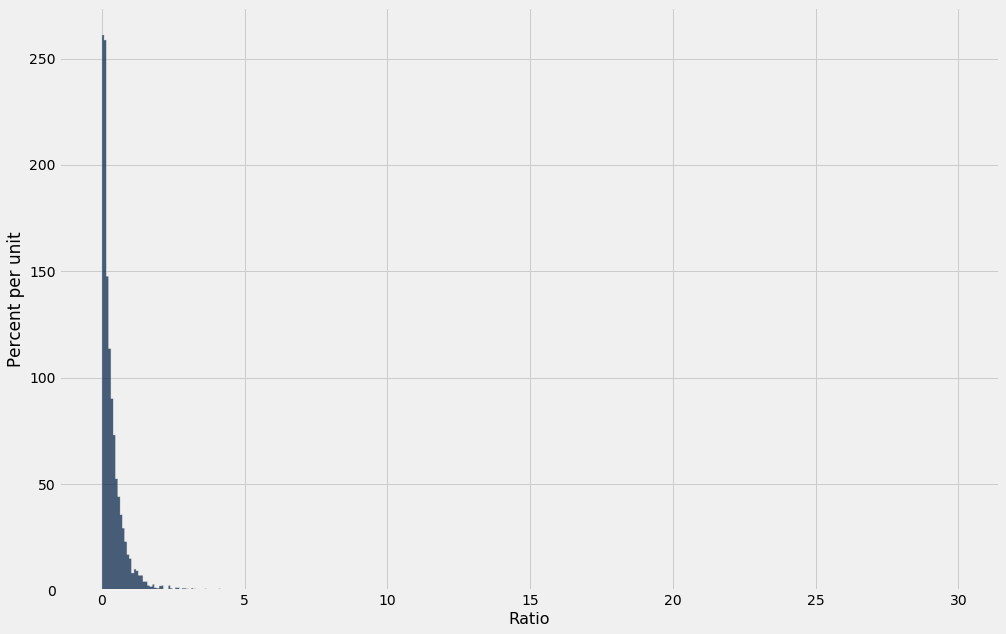

In [15]:
plot = hotpost.hist('Ratio', bins = np.arange(0,30,0.08), width=15, height=10)

In [31]:
'''Now let's gather data from the celebrity 'Cai Xukun' who is suspected to buy bots that automatically 
retweets his post. Though the bots can retweets arbitorily many times, it can only like the post once, 
so Ratio is reasonable.'''

def get_posts(cookies):
    basic_url = 'https://www.weibo.com/p/aj/v6/mblog/mbloglist?ajwvr=6&domain=100306&profile_ftype=1&is_all=1&pagebar=0&pl_name=Pl_Official_MyProfileFeed__22&id=1003061776448504&script_uri=/caizicaixukun&feed_type=0&page='
    allcontents = make_array()
    alllikes = make_array()
    allforwards = make_array()
    alldates = make_array()
    for i in np.arange(1, 50):
        response_stat = requests.get(basic_url+str(i), headers = headers)
        html = json.loads(response_stat.text.encode('utf-8').decode())['data']
        soup = BeautifulSoup(html, 'lxml')
        contents = make_array()
        for i in soup.find_all('div', {'class':'WB_text W_f14'}):
            contents = np.append(contents, i.text.replace('\n','').replace('\u200b\u200b\u200b\u200b','').replace('  ',''))
        retweets = make_array()
        for i in soup.find_all('span',{'node-type':'forward_btn_text'}):
            retweets = np.append(retweets, i.text.replace('\ue607', ''))
        likes = make_array()
        for i in soup.find_all('div',{'class':'WB_feed_handle'}):
            likes = np.append(likes, i.find_all('span',{'node-type':'like_status'})[0].text.replace('ñ',''))
        dates = make_array()
        for i in soup.find_all('div', {'action-type':"feed_list_item"}):
            dates = np.append(dates, i.find_all('a',{'node-type' : "feed_list_item_date"})[0].text.replace('月',' ').replace('日',' '))
        allcontents = np.append(allcontents, contents)
        alllikes = np.append(alllikes, likes)
        allforwards = np.append(allforwards, retweets)
        alldates = np.append(alldates, dates)
        #print("Getting info from Cai's page " + str())
        time.sleep(0.8)
    return allcontents, alllikes, allforwards, alldates

In [32]:
contents, hislikes, forwards, dates = get_posts(cookies)

In [58]:
Histable = Table().with_column('Content', contents, 'Number of Forwards', forwards, 'Number of Likes', hislikes,'Date', dates)
Histable.item(48)

Content,Number of Forwards,Number of Likes,Date
我是#偶像练习生#蔡徐坤，全民制作人，谢谢关照,309421,973780,4 6 19:16


In [59]:
formatlist = make_array()
for i in np.arange(49):
    formatlist = np.append(formatlist, ' %m %d  %H:%M')
for i in np.arange(49,106):
    formatlist = np.append(formatlist, ' %Y-%m-%d %H:%M')

In [60]:
Histable = Histable.with_column('Number of Forwards', Histable.apply(int, 'Number of Forwards'), 'Number of Likes',Histable.apply(int, 'Number of Likes'))
Histable = Histable.with_column('Ratio', Histable.column(1)/Histable.column(2)).with_column('format', formatlist)
Histable = Histable.with_column('Date', Histable.apply(datetime.strptime, 'Date', 'format')).drop('format')
def convert(x):
    date = x
    if x.year == 1900:
        date = x.replace(year = 2018)
    return date
Histable = Histable.with_column('Date', Histable.apply(convert, 'Date'))
Histable

Content,Number of Forwards,Number of Likes,Date,Ratio
置顶《Wait Wait Wait》作词：蔡徐坤作曲：蔡徐坤和声编写：蔡徐坤和声：蔡徐坤制作人：蔡徐坤 KWai ...,26226176,1322452,2018-08-23 10:11:00,19.8315
老规矩 #尖叫之夜#,5920839,344810,2018-12-01 16:43:00,17.1713
#新浪20年##我和新浪的故事# 是这个平台让我有幸认识了你们，也是在这里记录了我的点滴成长。感谢一路有你同行， ...,1601160,302581,2018-12-01 11:52:00,5.29167
望,5857536,412867,2018-11-29 17:41:00,14.1875
嗯 几张挺认真的图 #COSMO时尚美丽盛典#,4275064,409442,2018-11-28 21:25:00,10.4412
看或不看吃或不吃...,5531794,555394,2018-11-27 20:50:00,9.96013
全息幻彩，为你而来。vivo X23幻彩版今日开售。你要来合拍一张吗？#vivo X23全息幻彩#Lvivo-的 ...,29872468,381329,2018-11-23 09:58:00,78.3378
#NINEPERCENT首张专辑##NINEPERCENT耳边情话#这场无限大冒险，与你共同开启 ，#ToThe ...,9380599,329937,2018-11-20 12:45:00,28.4315
打卡、,26842493,532681,2018-11-19 15:37:00,50.3913
中国，一点都不能少！#我深深的爱着这个国家# ​​​,348830,454864,2018-11-18 00:40:00,0.766889


In [109]:
Histable.show()

Content,Number of Forwards,Number of Likes,Date,Ratio
置顶《Wait Wait Wait》作词：蔡徐坤作曲：蔡徐坤和声编写：蔡徐坤和声：蔡徐坤制作人：蔡徐坤 KWai ...,26226176,1322452,2018-08-23 10:11:00,19.8315
老规矩 #尖叫之夜#,5920839,344810,2018-12-01 16:43:00,17.1713
#新浪20年##我和新浪的故事# 是这个平台让我有幸认识了你们，也是在这里记录了我的点滴成长。感谢一路有你同行， ...,1601160,302581,2018-12-01 11:52:00,5.29167
望,5857536,412867,2018-11-29 17:41:00,14.1875
嗯 几张挺认真的图 #COSMO时尚美丽盛典#,4275064,409442,2018-11-28 21:25:00,10.4412
看或不看吃或不吃...,5531794,555394,2018-11-27 20:50:00,9.96013
全息幻彩，为你而来。vivo X23幻彩版今日开售。你要来合拍一张吗？#vivo X23全息幻彩#Lvivo-的 ...,29872468,381329,2018-11-23 09:58:00,78.3378
#NINEPERCENT首张专辑##NINEPERCENT耳边情话#这场无限大冒险，与你共同开启 ，#ToThe ...,9380599,329937,2018-11-20 12:45:00,28.4315
打卡、,26842493,532681,2018-11-19 15:37:00,50.3913
中国，一点都不能少！#我深深的爱着这个国家# ​​​,348830,454864,2018-11-18 00:40:00,0.766889


In [69]:
Histable.to_csv('Histable.csv')
Histable.take[:49].to_csv('2018Histable.csv')

## Visualizing the number of Cai's Forward/Likes chronologically and we can see the difference: after 2017 his Ratio increase dramatically to an unresonable value

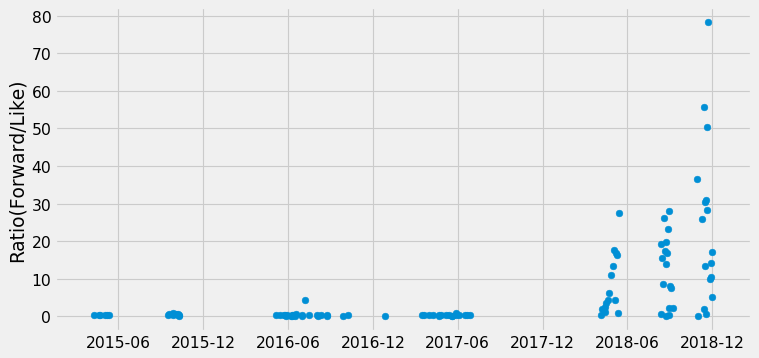

In [61]:
#Cai Xukun became famous since March, 2018 in a TV show, and we can see the ratio increase dramatically.
plt.figure(figsize=(10, 5), dpi=80)
plt.ylabel('Ratio(Forward/Like)')
plt.scatter(Histable.column('Date'),Histable.column('Ratio'), )

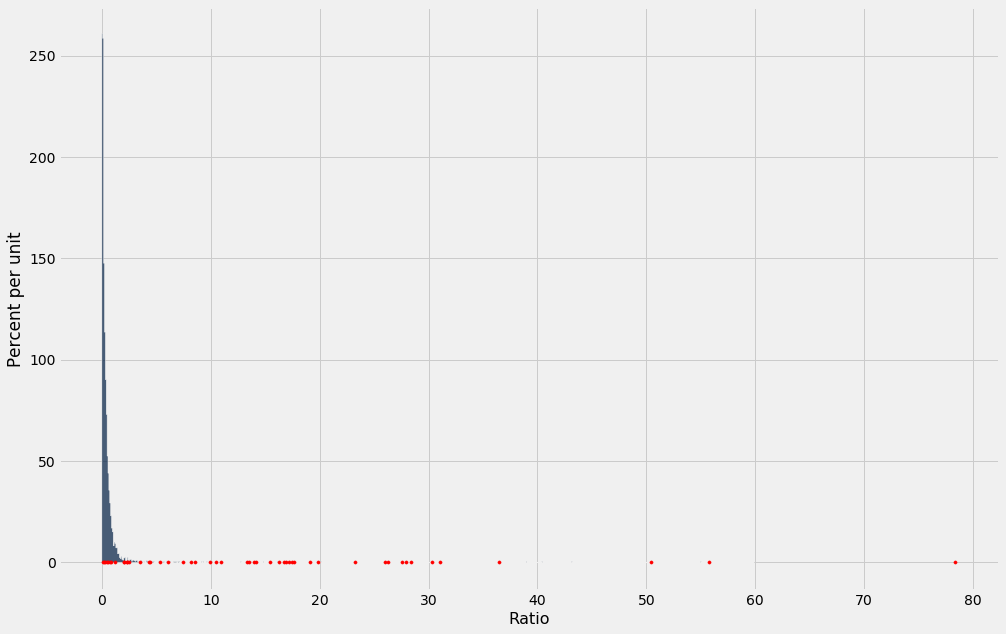

In [68]:
#Here we choose Cai's 2018 posts to visualize their position
hotpost.hist('Ratio', bins = np.arange(0,60,0.08), width=15, height=10)
plt.scatter(Histable.take[:49].column('Ratio'), np.zeros(49), color='red', s=10).set_zorder(2)

## Conducting permutation(A/B) test to see whether Cai's posts and normal posts are drawn from the same distribution

In [102]:
'''Here we are going to conduct the permutation(A/B) test, which I learned from DSC10.
Statistic: The absolute difference of mean of Ratio between Group normal and Group Cai.(According to null hypothesis,
we assume there is no difference between group normal and Group Cai, so we shuffle the Group name to see whether doing
so produces any difference on our statistic)
Null hypothesis: The difference between Cai's sample and the hot sample is due to nothing but chance.
Alternate Hypothesis: Cai's Ratio is higher than normal posts.
A similar test can be found on https://ucsd-ets.github.io/dsc10-fa18-textbook/chapters/12/2/Deflategate
'''
repetitions = 5000
stats = make_array()
samplehot = hotpost.sample(150).with_column('Group', np.repeat('Normal', 150)).select('Ratio', 'Group')
samplecai = Histable.take[:49].with_column('Group', np.repeat('Cai', 49)).select('Ratio', 'Group')
original = samplehot.append(samplecai)
original_stat = abs(original.group('Group', np.mean).column('Ratio mean')[0]-original.group('Group', np.mean).column('Ratio mean')[1])
original_stat

14.79661601048057

In [103]:
#starting the permutation test
for i in np.arange(0, repetitions):
    shuffled = original.sample(with_replacement = False).column('Group')
    shuffled_original = original.with_column('Group', shuffled)
    stat = abs(shuffled_original.group('Group', np.mean).column('Ratio mean')[0]-shuffled_original.group('Group', np.mean).column('Ratio mean')[1])
    stats = np.append(stat, stats)
stats

array([0.75327099, 1.15968069, 0.02607385, ..., 0.86750698, 2.848319  ,
       1.14197496])

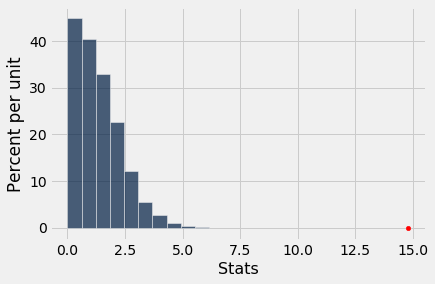

In [110]:
Table().with_column('Stats',stats).hist()
plt.scatter(original_stat, 0, color='red', s=20).set_zorder(2)

In [106]:
#So shall we reject the null hypothesis? What is the P-value?
P_value = np.sum(stats>=original_stat)/repetitions
P_value

0.0

In [470]:
#since P < 0.05, we reject the null hypothesis
#However, though we know it is not normal, we do not know what cause the odd. We cannot assert that his fans 
#or himself bought bots.
#Now let's see what kind of user forwards his posts, and what do they say when forwarding the posts.
def forward_content (cookies):
    basic_url = 'https://www.weibo.com/aj/v6/mblog/info/big?ajwvr=6&id=4308412919639764&max_id=4309399986646724&page='
    namelist = make_array()
    contentlist = make_array()
    for i in np.arange(1, 55):
        response_stat = requests.get(basic_url+str(i), headers = headers)
        html = json.loads(response_stat.text.encode('utf-8').decode())['data']['html']
        soup = BeautifulSoup(html, 'lxml')
        contents = make_array()
        for i in soup.find_all('span', {'node-type':"text"}):
            contents = np.append(contents, i.text)
        usernames = make_array()
        for i in soup.find_all('a', {'node-type':"name"}):
            usernames = np.append(usernames, i.text)
        namelist = np.append(namelist, usernames)
        contentlist = np.append(contentlist, contents)
        time.sleep(0.8)
    return namelist, contentlist

In [471]:
namelist, contentlist = forward_content (cookies)

In [476]:
forwardtable = Table().with_column('Username', namelist, 'Content', contentlist)
forwardtable

Username,Content
蔡徐坤粉丝团官微,蔡徐坤 #和KUN的蓬蓬时刻# 收到 @蔡徐坤
蔡徐坤数据站,蔡徐坤 💌#和KUN的蓬蓬时刻# 冒险 @蔡徐坤
AK47-BIUBIUBIUBIU,蔡徐坤 💌#和KUN的蓬蓬时刻# 冒险 @蔡徐坤
用秃头照亮你的路,蔡徐坤 也期待六公主啦@蔡徐坤
蔡徐坤全球粉丝后援会,蔡徐坤#蔡徐坤的幻彩秘密# 这场冒险，IKUN和你一起前行@蔡徐坤
蔡徐坤妈妈团LovelyClub,蔡徐坤｜#蔡徐坤的幻彩秘密# 与你冒险@蔡徐坤
蔡徐坤姐姐团_Kunsland,蔡徐坤 #蔡徐坤《WaitWaitWait》# 最精彩的时光是与你沉迷奇境，祝新专大卖。@蔡徐坤
K字护卫队,蔡徐坤#蔡徐坤的幻彩秘密# to the kun，我们来了。@蔡徐坤
辣手非洲猪,你的模样，我都爱，蔡徐坤
岜冬天_的火焰弓的1867,


In [479]:
#Let do some text mining!
forwardtable.group('Content').sort('count', descending = True)

Content,count
//@瓜·无条件爱你:宝贝蔡徐坤,95
,82
//@Kun陌:不同曲风，不同声线，每一个不同汇成同一个你@蔡徐坤,63
//@睫毛膏很淘气:六女儿肯定很可爱,18
转发微博,9
//@何佳琳0330:我一直在@蔡徐坤,9
@蔡徐坤 我在明星ALL榜上为你加油啦，你是我今生唯一的执著哦。蔡徐坤 棒棒哒！快来为TA应援吧,5
碰巧光诞生了你，让我的跟随有了依据。 //@璃璃初花颜:期待//@蔡徐坤正宫后援会:蔡徐坤 | #NINEP ...,4
蔡徐坤加油，❤️你。@蔡徐坤 我永远支持你！我们一起拿下 #明星势力榜# 第一名！,3
我们就在你身旁 未来要护你成王 //@璃璃初花颜:期待//@蔡徐坤正宫后援会:蔡徐坤 | #NINEPERC ...,3


In [511]:
#Of all the 350 retweets, there are only 39 distinct retweets, 
#meaning that all other retweets are contains same words posted by different account.
#Here we find an evidence of the existence of bot.
#What can we see from these accounts?
from wordcloud import WordCloud
import jieba

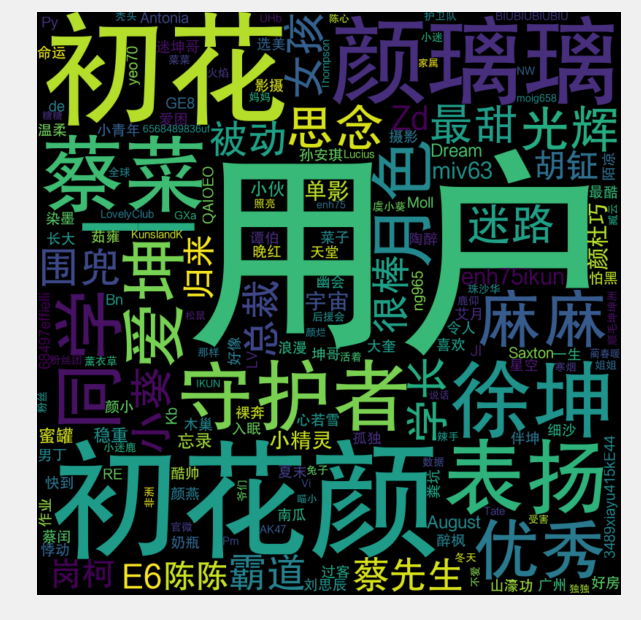

In [539]:
merged = ''
for x in forwardtable.column('Username'):
    merged = merged+''+x
mytext = ' '.join(jieba.cut(merged, cut_all = False))
fontpath = 'FZHTJW.TTF'
wordcloud = WordCloud(font_path = fontpath, width=800, height=800, margin=0, collocations=False).generate(mytext)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [534]:
#The largest word in the wordcloud literally means 'user' in English, so the username of the account retweeting are 
#mostly composed of the word 'User' plus a series of numbers, as shown below
forwardtable.where('Username', are.containing('用户'))

Username,Content
用户6789099115,//@睫毛膏很淘气:六女儿肯定很可爱
用户6568515657,//@瓜·无条件爱你:宝贝蔡徐坤
用户6787981614,//@睫毛膏很淘气:六女儿肯定很可爱
用户6787981614,//@睫毛膏很淘气:六女儿肯定很可爱
用户6568869764,//@瓜·无条件爱你:宝贝蔡徐坤
用户6568869764,//@瓜·无条件爱你:宝贝蔡徐坤
用户6568515601,//@瓜·无条件爱你:宝贝蔡徐坤
用户6568515601,//@瓜·无条件爱你:宝贝蔡徐坤
用户6789106008,//@睫毛膏很淘气:六女儿肯定很可爱
用户6789106008,//@睫毛膏很淘气:六女儿肯定很可爱


In [535]:
#Also, this account is really dedicated in retweeting: it retweets 40 times in 10 seconds
forwardtable.where('Username', are.containing('初花'))

Username,Content
璃璃初花颜,Love who you wanna love. Be who you wanna be. 蔡徐坤@蔡徐坤 ...
璃璃初花颜,"Sometimes, you need to step outside, get some fresh air, ..."
璃璃初花颜,"Life is painting a picture, not doing a sum. 蔡徐坤@蔡徐坤 ..."
璃璃初花颜,everybody dies， but not everybody lives。 蔡徐坤@蔡徐坤 //@璃璃初 ...
璃璃初花颜,碰巧光诞生了你，让我的跟随有了依据。 //@璃璃初花颜:期待//@蔡徐坤正宫后援会:蔡徐坤 | #NINEP ...
璃璃初花颜,碰巧光诞生了你，让我的跟随有了依据。 //@璃璃初花颜:期待//@蔡徐坤正宫后援会:蔡徐坤 | #NINEP ...
璃璃初花颜,Love who you wanna love. Be who you wanna be. 蔡徐坤@蔡徐坤 ...
璃璃初花颜,"Sometimes, you need to step outside, get some fresh air, ..."
璃璃初花颜,"Life is painting a picture, not doing a sum. 蔡徐坤@蔡徐坤 ..."
璃璃初花颜,everybody dies， but not everybody lives。 蔡徐坤@蔡徐坤 //@璃璃初 ...


In [536]:
#The text-mining provides ann evidence for that this celebrity is using bots to retweet his posts

# So my conclusion on this investigation is that 'Cai' indeed has abnormal number of retweet in his posts this year, and one of the reason is some accounts repeatedly retweet his posts for tens of times per second